In [46]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes, fetch_california_housing, load_iris
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from scipy.stats import uniform, randint

In [ ]:
california_x, california_y = fetch_california_housing(return_X_y=True)
california_y.shape

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

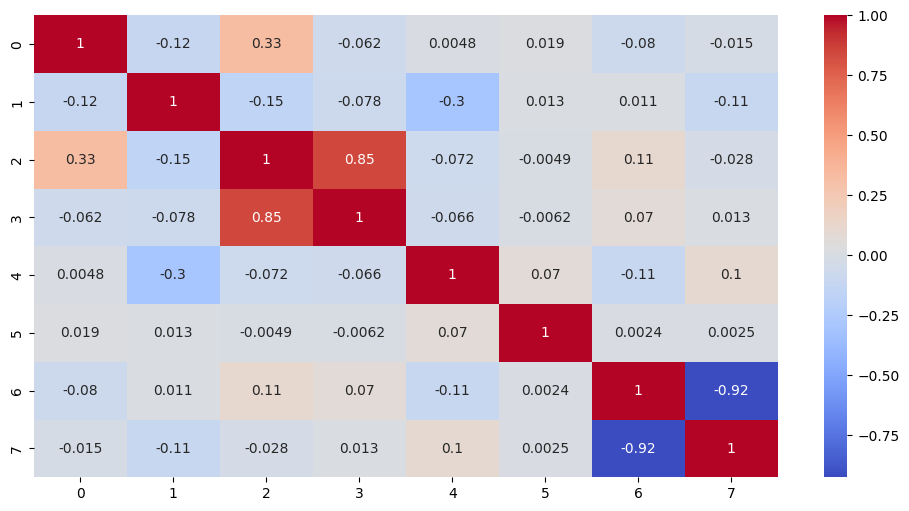

In [32]:
x_df = pd.DataFrame(california_x)
corr = x_df.corr()
plt.figure(figsize=(12, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

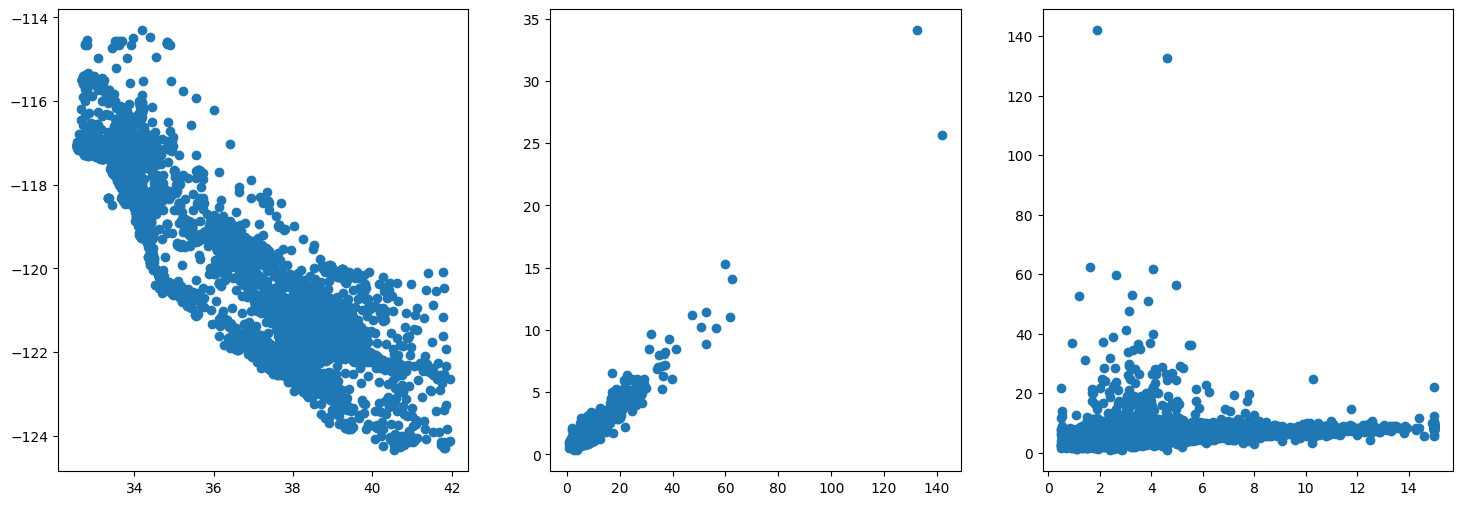

In [39]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
axes[0].scatter(california_x[:, 6], california_x[:, 7])
axes[1].scatter(california_x[:, 2], california_x[:, 3])
axes[2].scatter(california_x[:, 0], california_x[:, 2])
plt.show()

In [44]:
cleared_x = np.delete(california_x, [2, 6], axis=1)
x_train, x_test, y_train, y_test = train_test_split(cleared_x, california_y, test_size=0.3, random_state=42)

sc = StandardScaler()
scaled_x_train = sc.fit_transform(x_train)
scaled_x_test = sc.transform(x_test)

In [51]:
lm = LinearRegression()  # в качестве baseline-модели
lm.fit(scaled_x_train, y_train)
lm_pred = lm.predict(scaled_x_test)
print('LM MSE:', mean_squared_error(y_test, lm_pred))

params = { 
    'n_estimators': randint(10, 200),
    'max_samples': uniform(0.1, 0.9)   
}

print('Ожидаем несильно отличающийся результат от обычной LM')
bagging_lm = BaggingRegressor(estimator=LinearRegression())
random_search_lm = RandomizedSearchCV(
    estimator=bagging_lm,
    param_distributions=params,
    n_iter=100,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    random_state=42, 
    verbose=1
)
random_search_lm.fit(scaled_x_train, y_train)
print("Лучшие параметры:", random_search_lm.best_params_)
print("Лучший MSE:", -random_search_lm.best_score_)

LM MSE: 0.642846974755756
Ожидаем несильно отличающийся результат от обычной LM
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Лучшие параметры: {'max_samples': np.float64(0.9485682135021829), 'n_estimators': 80}
Лучший MSE: 0.7579536106541417


In [54]:
dt = DecisionTreeRegressor(random_state=42)
params_tree = {
    'max_depth': randint(3, 30),
    'min_samples_split': randint(2, 50),
    'min_samples_leaf': randint(1, 30),
    'max_leaf_nodes': randint(10, 200),
    
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    
    'splitter': ['best', 'random'],
    
    'max_features': ['sqrt', 'log2', None] + list(np.arange(0.1, 1.1, 0.1)),
    
    'ccp_alpha': uniform(0.0, 0.1)
}
random_search_tree = RandomizedSearchCV(
    estimator=dt,
    param_distributions=params_tree,
    n_iter=100,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

random_search_tree.fit(scaled_x_train, y_train)

print("Лучшие параметры:", random_search_tree.best_params_)
print("Лучший MSE:", -random_search_tree.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Лучшие параметры: {'ccp_alpha': np.float64(0.0006952130531190704), 'criterion': 'poisson', 'max_depth': 29, 'max_features': np.float64(0.6), 'max_leaf_nodes': 71, 'min_samples_leaf': 5, 'min_samples_split': 34, 'splitter': 'best'}
Лучший MSE: 0.5358396548969334


In [55]:
random_search_tree_unscaled = RandomizedSearchCV(
    estimator=dt,
    param_distributions=params_tree,
    n_iter=100,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

random_search_tree_unscaled.fit(x_train, y_train)

print("Лучшие параметры:", random_search_tree.best_params_)
print("Лучший MSE:", -random_search_tree.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Лучшие параметры: {'ccp_alpha': np.float64(0.0006952130531190704), 'criterion': 'poisson', 'max_depth': 29, 'max_features': np.float64(0.6), 'max_leaf_nodes': 71, 'min_samples_leaf': 5, 'min_samples_split': 34, 'splitter': 'best'}
Лучший MSE: 0.5358396548969334
